# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [2]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

In [3]:
print(len(x_train),len(y_train),len(x_test))

240 240 60


### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`

linear regression is basically fitting a line throught the data geometrically.
to fit the line we use distance between point and try to reduce that distance so that the line is perfectly fit throught the point
Now the problem reduces to a optimisation problem which say to minimise the distance or minimise the error.
We run our data multiple time(epoch) to fit and find the best fit line ...
there are parameter such as epoch


In [4]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [5]:
# 1.3.1.2
# implement Linear Regression
def linear_regression_fit(x_train,y_train,learning_rate=0.1,epoch=1000):
    total=x_train.shape[0]
    weights=np.zeros(x_train.shape[1])
    bias=0
    for i in range(epoch):
        y_pred=np.dot(x_train,weights)+bias
        error=(y_pred-y_train)
        dw=(1/total)*np.dot(x_train.T,error)
        db=(1/total)*np.sum(error)
        weights=weights-learning_rate*dw
        bias=bias-learning_rate*db
#     print("dw ,db  :",dw," : ",db)
#     print(y_pred.shape)
    return weights,bias

In [6]:
def linear_regression_predict(w,b,x_test):
    return np.dot(x_test,w)+b

#### Just for checking the model is working or not The below parameter are not the best parameter

In [7]:
w,b=linear_regression_fit(x_train,y_train,learning_rate=0.1,epoch=100)
y_pred=linear_regression_predict(w,b,x_test)

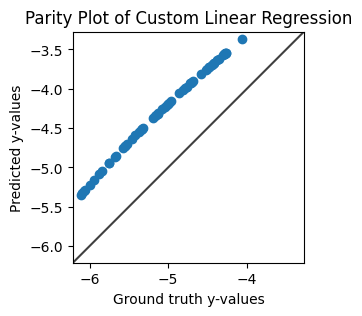

In [8]:
fig, ax = plt.subplots(figsize=(3,3))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

In [9]:
def mean_square_error(y_pred,y):
    total=y.shape[0]
    return np.sum((y_pred-y)**2)/total

In [10]:
def plot(y_pred,y_test):
    fig, ax = plt.subplots(figsize=(3,3))

    ax.scatter(y_test, y_pred)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    ax.set_title('Parity Plot of Custom Linear Regression')
    ax.set_xlabel('Ground truth y-values')
    ax.set_ylabel('Predicted y-values')
    plt.show()

In [11]:
# 1.3.2.3
# try with different learning rates and choose the best one
def best_parameter():
    params=[]
    list_lr=[.0001,.001,.01,.1,1]
    list_ep=[10,100,1000,10000]
    for lr in list_lr:
        list_temp=[]
        for ep in list_ep:
            w,b=linear_regression_fit(x_train,y_train,learning_rate=lr,epoch=ep)
            y_pred=linear_regression_predict(w,b,x_test)
            mse=mean_square_error(y_pred,y_test)
            print("lr: ",lr," ep:: ",ep,"    mse:  ",mse)
#             plot(y_pred,y_test)
            params.append([lr,ep,mse])
#             print("\n")
    return params[(np.argmin(np.array(params),axis=0)[2])]

lr,ep,mse=best_parameter()
printmd("**best parameter are:**")
print("lr:-  ",lr,"\nnumber of epochs:-  ",ep,"\nmse for params:-   ",mse)

lr:  0.0001  ep::  10     mse:   25.866827260049114
lr:  0.0001  ep::  100     mse:   25.77445814425949
lr:  0.0001  ep::  1000     mse:   24.855557709744456
lr:  0.0001  ep::  10000     mse:   16.78687379718647
lr:  0.001  ep::  10     mse:   25.774463429485024
lr:  0.001  ep::  100     mse:   24.855583210249527
lr:  0.001  ep::  1000     mse:   16.786136988233288
lr:  0.001  ep::  10000     mse:   0.6328994655560803
lr:  0.01  ep::  10     mse:   24.855855156537164
lr:  0.01  ep::  100     mse:   16.77876519097287
lr:  0.01  ep::  1000     mse:   0.6315234579947879
lr:  0.01  ep::  10000     mse:   0.08974534864763406
lr:  0.1  ep::  10     mse:   16.704735235399053
lr:  0.1  ep::  100     mse:   0.6178661743033532
lr:  0.1  ep::  1000     mse:   0.08978869421914397
lr:  0.1  ep::  10000     mse:   0.0065844205077928
lr:  1  ep::  10     mse:   0.4911906767068253
lr:  1  ep::  100     mse:   0.09021503554121946
lr:  1  ep::  1000     mse:   0.006587419137744231
lr:  1  ep::  10000   

**best parameter are:**

lr:-   0.1 
number of epochs:-   10000 
mse for params:-    0.0065844205077928


In [12]:
##for best parameter 
lr,ep,mse=best_parameter()
w,b=linear_regression_fit(x_train,y_train,learning_rate=lr,epoch=ep)
y_pred=linear_regression_predict(w,b,x_test)

lr:  0.0001  ep::  10     mse:   25.866827260049114
lr:  0.0001  ep::  100     mse:   25.77445814425949
lr:  0.0001  ep::  1000     mse:   24.855557709744456
lr:  0.0001  ep::  10000     mse:   16.78687379718647
lr:  0.001  ep::  10     mse:   25.774463429485024
lr:  0.001  ep::  100     mse:   24.855583210249527
lr:  0.001  ep::  1000     mse:   16.786136988233288
lr:  0.001  ep::  10000     mse:   0.6328994655560803
lr:  0.01  ep::  10     mse:   24.855855156537164
lr:  0.01  ep::  100     mse:   16.77876519097287
lr:  0.01  ep::  1000     mse:   0.6315234579947879
lr:  0.01  ep::  10000     mse:   0.08974534864763406
lr:  0.1  ep::  10     mse:   16.704735235399053
lr:  0.1  ep::  100     mse:   0.6178661743033532
lr:  0.1  ep::  1000     mse:   0.08978869421914397
lr:  0.1  ep::  10000     mse:   0.0065844205077928
lr:  1  ep::  10     mse:   0.4911906767068253
lr:  1  ep::  100     mse:   0.09021503554121946
lr:  1  ep::  1000     mse:   0.006587419137744231
lr:  1  ep::  10000   

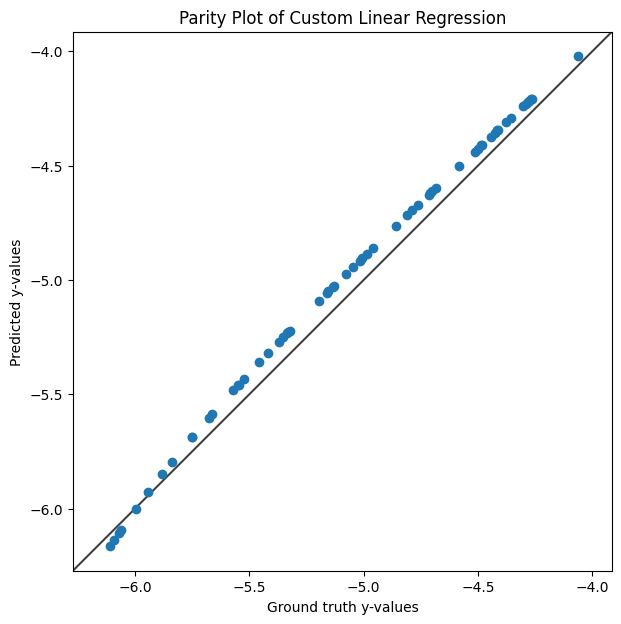

In [13]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

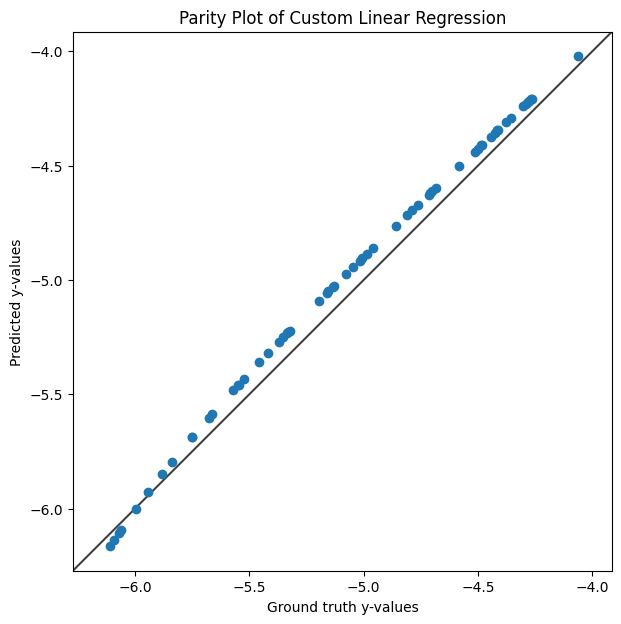

In [14]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`
#### Problem with linear rigression

we know for very small learning rate with higher number of epoch our linear regression is tends to fit for linear rate assuming that all assumpses are satisfyed

So to overcome this problem we give some weight to learning of linear regression and some weight to our  ridge which is basically a term to increasing the overall weight of our minimising function so that it protect linear regression by overfitting the training data

#### Ridge

Ridge regressions a regularization technique to save our linear regression model from overfitting .
Ridge regression take sqaure of magnitude of the weight vector as it takes square of the magnitude of the weights which result in dense matrix as the optimum can be anywhere on the contour.

In [15]:
# 1.3.2.2
# you should not have imported sklearn before this point
import sklearn
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error as rmse
ridge=Ridge(alpha=0.01)
ridge.fit(x_train,y_train)

## on training dataset
y_train_pred=ridge.predict(x_train)
rmse_score=rmse(y_train,y_train_pred,squared=False)
# y_test_pred=ridge.predict(x_test)
# rmse_score=rmse(y_test,y_test_pred,squared=False)
print("rmse score on y_test with alpha 0.01:  ",rmse_score)

rmse score on y_test with alpha 0.01:   0.0052742447503083675


In [16]:

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
# alphas=[0.00000001,0.0000001,0.000001,0.00001,0.0001,0.001,0.01,.1,1]
alphas=[10e-6,10e-5,10e-4,10e-3,10e-2,10e-1,10e+0,10e+1,10e+2]
rmse_list=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(x_train,y_train)
    y_train_pred=ridge.predict(x_train)
    rmse_score=rmse(y_train,y_train_pred,squared=False)
    rmse_list.append(rmse_score)
print(rmse_list)
list_f=[]
list_f.append(alphas)
list_f.append(rmse_list)
table=pd.DataFrame(list_f)
table.T

[8.274571390098924e-05, 0.00036232655853068985, 0.0017263531104302534, 0.0052742447503083675, 0.019125848666549736, 0.07987415433768387, 0.4266265608667447, 1.4175613911898268, 2.247936684354301]


,0,1
0,0.00001,0.000083
1,0.00010,0.000362
2,0.00100,0.001726
3,0.01000,0.005274
4,0.10000,0.019126
5,1.00000,0.079874
6,10.00000,0.426627
7,100.00000,1.417561
8,1000.00000,2.247937


<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`

##### How does it affect the results here? Explain in 5-10 lines in total.
Alpha or ridge parameter , it is basically the weight which we give to the regularization term ..
let say we say alpha =1 it mean we are giving equal weight to the regularization term like linear regression .

if alpha became zero our term became similiar like linear regression without regularization  as we are not doing regularization at all

alpha range from 0 to infinity 
infinity means our model is purely doing regularization task and doent even fiiting linear regression
it like doint generalisation 
at alpha =0 model has high variance and low bias
at alpha >0 some bias is added to the model
at alpha tends to infinity model is having higher and higher bias

In [17]:
def ridge_plot(y_pred,y_test):
    fig, ax = plt.subplots(figsize=(5,5))

    ax.scatter(y_test, y_pred)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    ax.set_title('Parity Plot of Custom Ridge Regression')
    ax.set_xlabel('Ground truth y-values')
    ax.set_ylabel('Predicted y-values')
    plt.show()

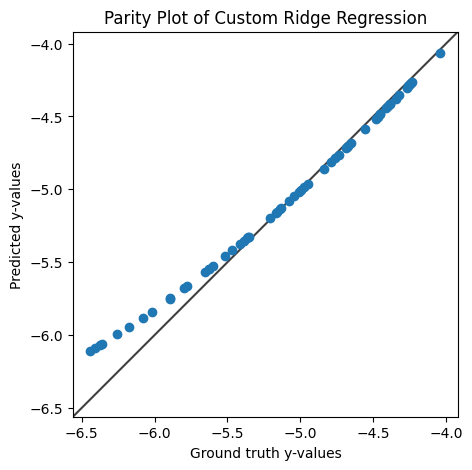

In [18]:
# 1.3.2.4
ridge=Ridge(alpha=10e-2)
ridge.fit(x_train,y_train)
y_test_pred=ridge.predict(x_test)
ridge_plot(y_test,y_test_pred)

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`

#### lasso or l1 regularizer

lasso regression is a regularization technique to save our linear regression model from overfitting .
lasso regression take absoulute magnitude weight of the weight vector which is basically plot to double modulus function and at only corner we get the minimum which result in sparse matrix

In [19]:
###  Sklearn rmse =mean square error without squared term so if squared=False mse==>>  RMSE

In [20]:
# 1.3.3.2
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`

from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error as rmse
lasso=Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

## on training dataset
y_train_pred=lasso.predict(x_train)
rmse_score=rmse(y_train,y_train_pred,squared=False)
# y_test_pred=ridge.predict(x_test)
# rmse_score=rmse(y_test,y_test_pred,squared=False)
print("rmse score on y_test with alpha 0.01:  ",rmse_score)


# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
alphas=[0.0001,0.001,0.01,.1,1,0.002,0.02,0.2,2]
rmse_list=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(x_train,y_train)
    y_train_pred=lasso.predict(x_train)
    rmse_score=rmse(y_train,y_train_pred,squared=False)
    rmse_list.append(rmse_score)
print(rmse_list)
list_f=[]
list_f.append(alphas)
list_f.append(rmse_list)
table=pd.DataFrame(list_f)
table.T

rmse score on y_test with alpha 0.01:   0.15012849513382498
[0.009327821462103569, 0.03862696932475929, 0.15012849513382498, 0.26070683193344774, 2.1210574596933585, 0.04902891619354647, 0.15811890239485585, 0.4497090782925294, 2.4789777272439513]


,0,1
0,0.0001,0.009328
1,0.0010,0.038627
2,0.0100,0.150128
3,0.1000,0.260707
4,1.0000,2.121057
5,0.0020,0.049029
6,0.0200,0.158119
7,0.2000,0.449709
8,2.0000,2.478978


In [21]:
def lasso_plot(y_pred,y_test):
    fig, ax = plt.subplots(figsize=(5,5))

    ax.scatter(y_test, y_pred)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    ax.set_title('Parity Plot of Custom Ridge Regression')
    ax.set_xlabel('Ground truth y-values')
    ax.set_ylabel('Predicted y-values')
    plt.show()

<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`


Alpha or lasso parameter , it is basically the weight which we give to the regularization term ..
let say we say alpha =1 it mean we are giving equal weight to the regularization term like linear regression .

if alpha became zero our term became similiar like linear regression without regularization  as we are not doing regularization at all

alpha range from 0 to infinity 
infinity means our model is purely doing regularization task and doent even fiiting linear regression
it like doint generalisation 
at alpha =0 model has high variance and low bias
at alpha >0 some bias is added to the model
at alpha tends to infinity model is having higher and higher bias

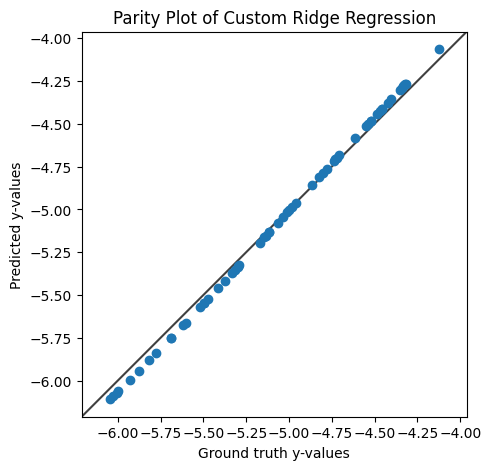

In [22]:
# 1.3.3.4
lasso=Lasso(alpha=0.01)
lasso.fit(x_train,y_train)
y_test_pred=lasso.predict(x_test)
lasso_plot(y_test,y_test_pred)

### Important

##### we may get better and better training score and mse using lower and lower alpha but it is not what we want we dont want our train mse to be lower rather we want our unseen data or test data mse to be lower 
##### so we should choose appropriate alpha such that model doesnt overfit and doesnt add high bias  as we want a balance between bias and variance of the data